# Visualization in python

Python has many visualization libraries. See this link https://www.anaconda.com/python-data-visualization-2018-why-so-many-libraries/.

Some of them are domain specfic like [pastalog](https://github.com/rewonc/pastalog) for neural network visualization. We'll cover **matplotlib**, a generic visualization library and small portion of  **seaborn** for statistical visualization.

# [Matplotlib](https://matplotlib.org/)

It is a widely used visualization library in python. As shown in above link, many other libraries(**pandas etc.**) depend on on matplotlib for visualization part. It is a massive library with extensive documentation.




[John D Hunter](https://en.wikipedia.org/wiki/John_D._Hunter) started matplotlib during post-doctoral research in neurobiology.

Here is link to his talk [matplotlib: Lessons from middle age](https://www.youtube.com/watch?v=e3lTby5RI54) at scipy 2012

%pylab: matplotlib  has connection with MATLAB. pylab provides a MATLAB like interface for plotting.

Check this page for warning.

https://matplotlib.org/users/shell.html#ipython-to-the-rescue

# Matplotlib structure

Everything in matplotlib is a hierarchy of nested objects.

- **figure** is the outermost object
    + It contains multiple **Axes** object(plots)

In [1]:
# install it if required
#!pip install matplotlib

# Anatomy of figures

<img height="500" width="700" src="https://matplotlib.org/_images/anatomy.png">

In [2]:
import matplotlib.pyplot as plt

# to inline the graphics in notebook
%matplotlib inline 

In [3]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


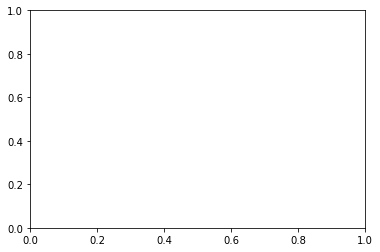

In [4]:
f, ax = plt.subplots()
print(type(f))
print(type(ax))

# f, ax = plt.subplots(nrows = 3, ncols = 2, sharex = True)

Let's see some nested objects

In [5]:
print(f.axes)


[<AxesSubplot:>]


In [6]:
dir(f.axes[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',

Let's see axes[x,y] property

In [7]:
print(type(f.axes[0].xaxis))

<class 'matplotlib.axis.XAxis'>


In [8]:
print(type(f.axes[0].xaxis.get_major_ticks()[0]))
print(type(f.axes[0].xaxis.majorTicks[0]))
print(type(f.axes[0].xaxis.label))


<class 'matplotlib.axis.XTick'>
<class 'matplotlib.axis.XTick'>
<class 'matplotlib.text.Text'>


# plt(pyplot) interface
function in plt operate on current figure , axes or creating one if it doesn't exists.

Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.755)


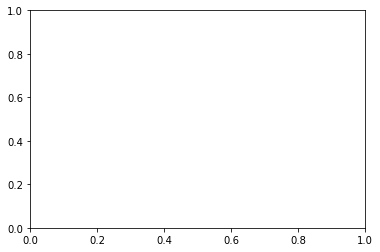

In [9]:
#Get the current figure
print(plt.gcf())

#Get current axis
print(plt.gca())


# An example

Text(0.5, 1.0, 'sin(x)')

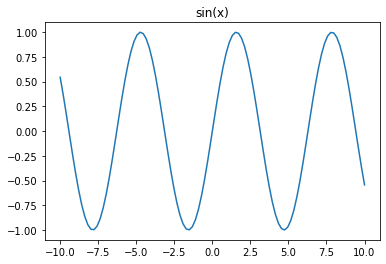

In [10]:
import numpy as np
x = np.linspace(-10,10,100)
plt.plot(x, np.sin(x))
plt.title('sin(x)')

see how plot operates on current axes

- plot 
https://github.com/matplotlib/matplotlib/blob/e0d31298647954cffcb415fbf87f0332e711aed5/lib/matplotlib/pyplot.py#L2771

- title
https://github.com/matplotlib/matplotlib/blob/e0d31298647954cffcb415fbf87f0332e711aed5/lib/matplotlib/pyplot.py#L3039

# plot revisit
plotting x vs y as line or marker

## Let's explicitly create figure and axes


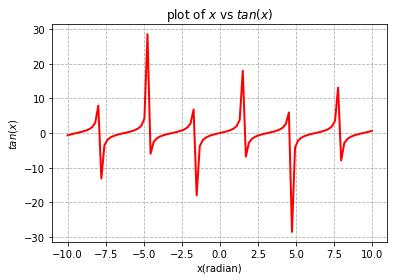

In [11]:
#Defining our figure and axis
f, ax = plt.subplots()

#Passing the values to plot, color and line width
ax.plot(x, np.tan(x), 'r-', lw=2)

#Creating the title for the image ($ makes the text italic)
ax.set_title('plot of $x$ vs $tan(x)$')

#Axis labels
ax.set_xlabel('x(radian)')
ax.set_ylabel('$tan(x)$')


ax.grid(which='major', axis='both', linestyle='--')



What happened here
- subplots created a figure and a axes
- used ax for 
    + plot created line plot with line property(color red and style --)
    + set labels
    + set grid

# Hist plot

[ 5.39692261  5.84563402  6.29434543  6.74305684  7.19176825  7.64047966
  8.08919107  8.53790248  8.98661389  9.4353253   9.88403671 10.33274812
 10.78145953 11.23017094 11.67888235 12.12759376 12.57630517 13.02501658
 13.47372799 13.9224394  14.37115081]
[0.02228604 0.04457208 0.         0.02228604 0.02228604 0.1114302
 0.15600227 0.22286039 0.22286039 0.20057435 0.20057435 0.24514643
 0.17828831 0.13371623 0.13371623 0.13371623 0.02228604 0.08914416
 0.02228604 0.04457208]


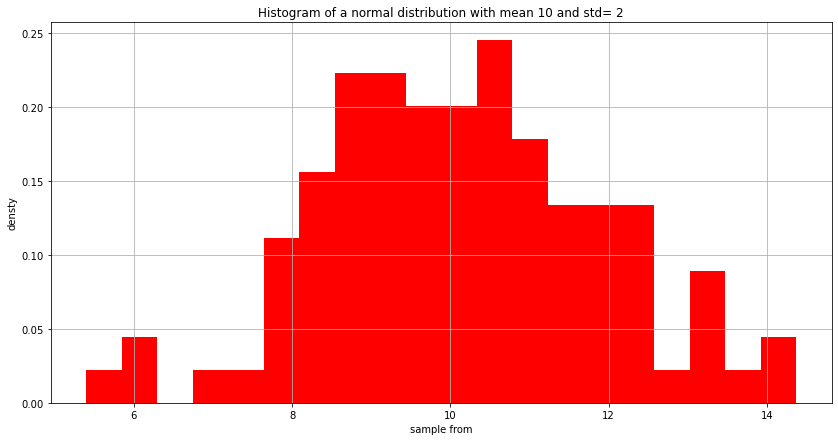

In [12]:
import numpy as np
np.random.seed(1)
mu = 10
std = 2
y1 = 2*np.random.randn(100) + mu

#Create empty figure
f, ax = plt.subplots(figsize=(14 ,7))

#Create a histogram with the given data, split into 20 bins
n, bins, patches=ax.hist(y1, bins=20, color='r', density=True)

#Figure information
ax.set_title('Histogram of a normal distribution with mean {} and std= {}'.format(mu, std))
ax.set_xlabel('sample from')
ax.set_ylabel('densty')

ax.grid(which='major', axis='both', linestyle='-')

print(bins)
print(n)

# Let's draw expected distribution

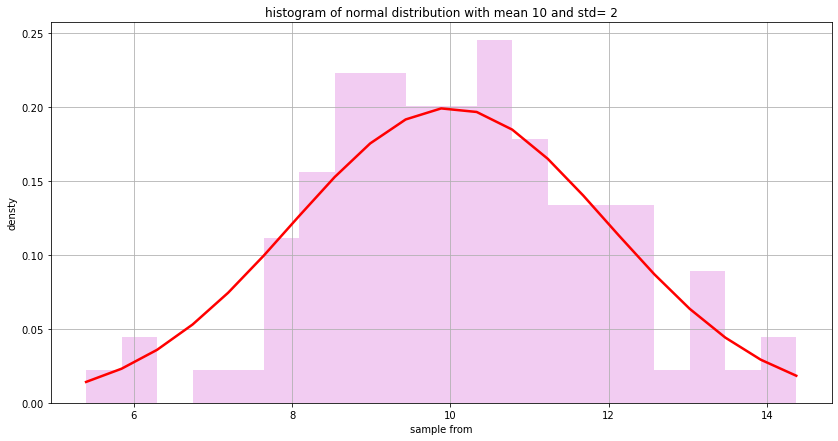

In [13]:
from scipy.stats import norm

np.random.seed(1)
mu =10
std=2
y1 = 2*np.random.randn(100) + mu

#Creating a new figure
f, ax = plt.subplots( figsize=(14 ,7))
n, bins, patches=ax.hist(y1, bins=20, color='m', density= True,alpha= .2)

#Drawing the expected distribution
y_density = norm.pdf(bins, mu, std)

#Figure information
ax.plot(bins, y_density, 'r-', linewidth=2.5)
ax.set_title('histogram of normal distribution with mean {} and std= {}'.format(mu, std))
ax.set_xlabel('sample from')
ax.set_ylabel('densty')
ax.grid(True)


# note bins are open inter val [   ) except last which is closed interval

## scatter and hist plot

(100,)
(100, 2)


Text(0, 0.5, 'count')

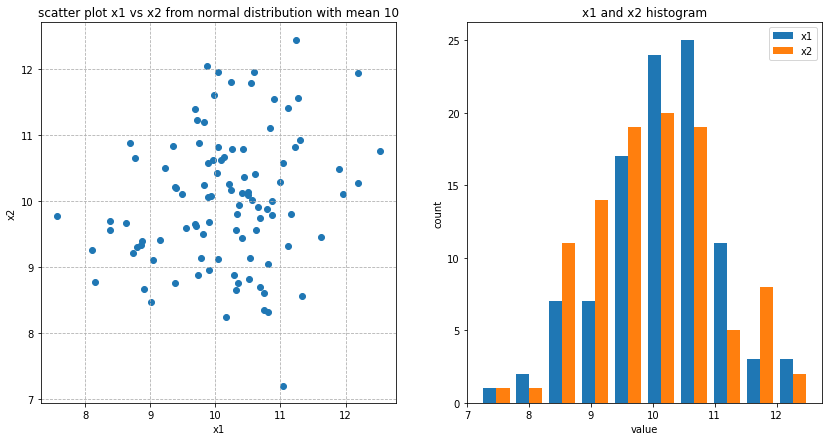

In [14]:
# Try stacked option
mu =10
x1 = np.random.randn(100) + mu
x2 = np.random.randn(100) + mu
print(x1.shape)

#Vertically stack the data
x_vstacked = np.column_stack((x1,x2))          
print(x_vstacked.shape)

#Create a new figure with two images side by side
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(14 ,7))

#Create a scatter plot on the left image
ax[0].scatter(x1, x2, marker= 'o')
#Figure information
ax[0].set_title('scatter plot x1 vs x2 from normal distribution with mean {}'.format(mu))
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].grid(which='major', axis='both', linestyle='--')

#Create a histogram on the right image
ax[1].hist(x_vstacked, bins =10, label=('x1', 'x2'))
#Figure information
ax[1].legend(loc='upper right')
ax[1].set_title('x1 and x2 histogram')
ax[1].set_xlabel('value')
ax[1].set_ylabel('count')


# More subplots customization gridspec
## Let's use data from

http://data.opencolorado.org/dataset/city-and-county-of-denver-real-property-apartment-and-commercial-characteristics

In [15]:
import pandas as pd

In [16]:
#!curl -O https://www.denvergov.org/media/gis/DataCatalog/real_property_apartment_and_commercial_characteristics/csv/real_property_apartment_and_commercial_characteristics.csv
p_df = pd.read_csv('https://www.denvergov.org/media/gis/DataCatalog/real_property_apartment_and_commercial_characteristics/csv/real_property_apartment_and_commercial_characteristics.csv', encoding = "ISO-8859-1")
p_df

,PARID,CD,OFCARD,OWNER,CO_OWNER,OWNER_NUM,OWNER_DIR,OWNER_ST,OWNER_TYPE,OWNER_APT,...,ASMT_APPR_LAND,TOTAL_VALUE,ASMT_LAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,TOT_UNITS,NBHD_CD,NBHD_1_CN,LEGL_DESCRIPTION
0,1100001000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,45800,45800,13280,13280,0,13280,NaN,4,GATEWAY N,T3 R66 S1 BEG NW COR E 5287.84FT S 1508.13FT W...
1,2100002000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,20800,20800,6030,6030,0,6030,NaN,4,GATEWAY N,T3 R66 S2 NW/4 EXC PT IN ADAMS COUNTY
2,2100003000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,20800,20800,6030,6030,0,6030,NaN,4,GATEWAY N,T3 R66 S2 NE/4 EXC PT TO ADAMS COUNTY
3,3100012000,1,1.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,176400,177400,51160,51450,0,51450,NaN,4,GATEWAY N,T3 R66 S3 BEG 70FT E OF NW COR S3 E 933.31FT S...
4,3100014000,1,0.0,ACM HIGH POINT VI LLC,NaN,4100.0,E,MISSISSIPPI,AVE,500,...,200,200,50,50,50,0,NaN,4,GATEWAY N,T3S R66W S3 NE/4 PT N/2 COM N/4 COR SD S3 TH S...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28561,1306100011000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,22900,22900,6640,6640,0,6640,NaN,4,GATEWAY N,T3 R65 S6 BEG NE COR S 1513.95 FT W 2639.57FT ...
28562,1306100012000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,22400,22400,6500,6500,0,6500,NaN,4,GATEWAY N,T3 R65 S6 BEG NW COR S 1513.95 FT W 2583.48FT ...
28563,1407200002000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,100,100,30,30,0,30,NaN,4,GATEWAY N,T2 R64 S7 BEG SW COR OF SD SEC N 2634.96FT E 8...
28564,1407200003000,1,0.0,CITY & COUNTY OF DENVER,NaN,201.0,W,COLFAX,AVE,401,...,100,100,30,30,0,30,NaN,4,GATEWAY N,T2 R64 S7 BEG SW COR OF SD SEC N 2634.96FT TO ...


In [17]:
# p_df = pd.read_csv('real_property_apartment_and_commercial_characteristics.csv', encoding = "ISO-8859-1")
# p_df

In [18]:
# only select TOT_UNITS not zero and TAX_DIST DENVER
pu_df = p_df[(p_df.TOT_UNITS !=0) & (p_df.TAX_DIST == 'DENVER')]
# pu_df.index.has_duplicates

In [19]:
pu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PARID                0 non-null      int64  
 1   CD                   0 non-null      int64  
 2   OFCARD               0 non-null      float64
 3   OWNER                0 non-null      object 
 4   CO_OWNER             0 non-null      object 
 5   OWNER_NUM            0 non-null      float64
 6   OWNER_DIR            0 non-null      object 
 7   OWNER_ST             0 non-null      object 
 8   OWNER_TYPE           0 non-null      object 
 9   OWNER_APT            0 non-null      object 
 10  OWNER_CITY           0 non-null      object 
 11  OWNER_STATE          0 non-null      object 
 12  OWNER_ZIP            0 non-null      object 
 13  SITE_NBR             0 non-null      float64
 14  SITE_DIR             0 non-null      object 
 15  SITE_NAME            0 non-null      object 
 16  SI

## Let's plot 
- TOTL_SQFT, TOT_UNITS and color code with price ASMT_TOT
- Histogram of TOT_UNITS
- Histogram of TOT_UNITS



In [20]:
# print number of non null value in each colums
pu_df.isnull().sum()

PARID                  0.0
CD                     0.0
OFCARD                 0.0
OWNER                  0.0
CO_OWNER               0.0
OWNER_NUM              0.0
OWNER_DIR              0.0
OWNER_ST               0.0
OWNER_TYPE             0.0
OWNER_APT              0.0
OWNER_CITY             0.0
OWNER_STATE            0.0
OWNER_ZIP              0.0
SITE_NBR               0.0
SITE_DIR               0.0
SITE_NAME              0.0
SITE_MODE              0.0
SITE_MORE              0.0
TAX_DIST               0.0
PROP_CLASS_LAND        0.0
PROP_CLASS_IMPS        0.0
PROPERTY_CLASS_DESC    0.0
BLD_NAME               0.0
GROSS_AREA             0.0
NET_AREA               0.0
BSMT_AREA              0.0
FBSMT_SQFT             0.0
NO_FLOORS              0.0
TOTL_SQFT              0.0
ZONE10                 0.0
D_CLASS_CN             0.0
ORIG_YOC               0.0
REMODEL                0.0
ASMT_APPR_LAND         0.0
TOTAL_VALUE            0.0
ASMT_LAND              0.0
ASSESS_VALUE           0.0
A

In [21]:
# can you drop na in TOTL_SQFT
pu_df = pu_df.dropna(subset= ['TOTL_SQFT'])

In [22]:
pu_df.isnull().sum()

PARID                  0.0
CD                     0.0
OFCARD                 0.0
OWNER                  0.0
CO_OWNER               0.0
OWNER_NUM              0.0
OWNER_DIR              0.0
OWNER_ST               0.0
OWNER_TYPE             0.0
OWNER_APT              0.0
OWNER_CITY             0.0
OWNER_STATE            0.0
OWNER_ZIP              0.0
SITE_NBR               0.0
SITE_DIR               0.0
SITE_NAME              0.0
SITE_MODE              0.0
SITE_MORE              0.0
TAX_DIST               0.0
PROP_CLASS_LAND        0.0
PROP_CLASS_IMPS        0.0
PROPERTY_CLASS_DESC    0.0
BLD_NAME               0.0
GROSS_AREA             0.0
NET_AREA               0.0
BSMT_AREA              0.0
FBSMT_SQFT             0.0
NO_FLOORS              0.0
TOTL_SQFT              0.0
ZONE10                 0.0
D_CLASS_CN             0.0
ORIG_YOC               0.0
REMODEL                0.0
ASMT_APPR_LAND         0.0
TOTAL_VALUE            0.0
ASMT_LAND              0.0
ASSESS_VALUE           0.0
A

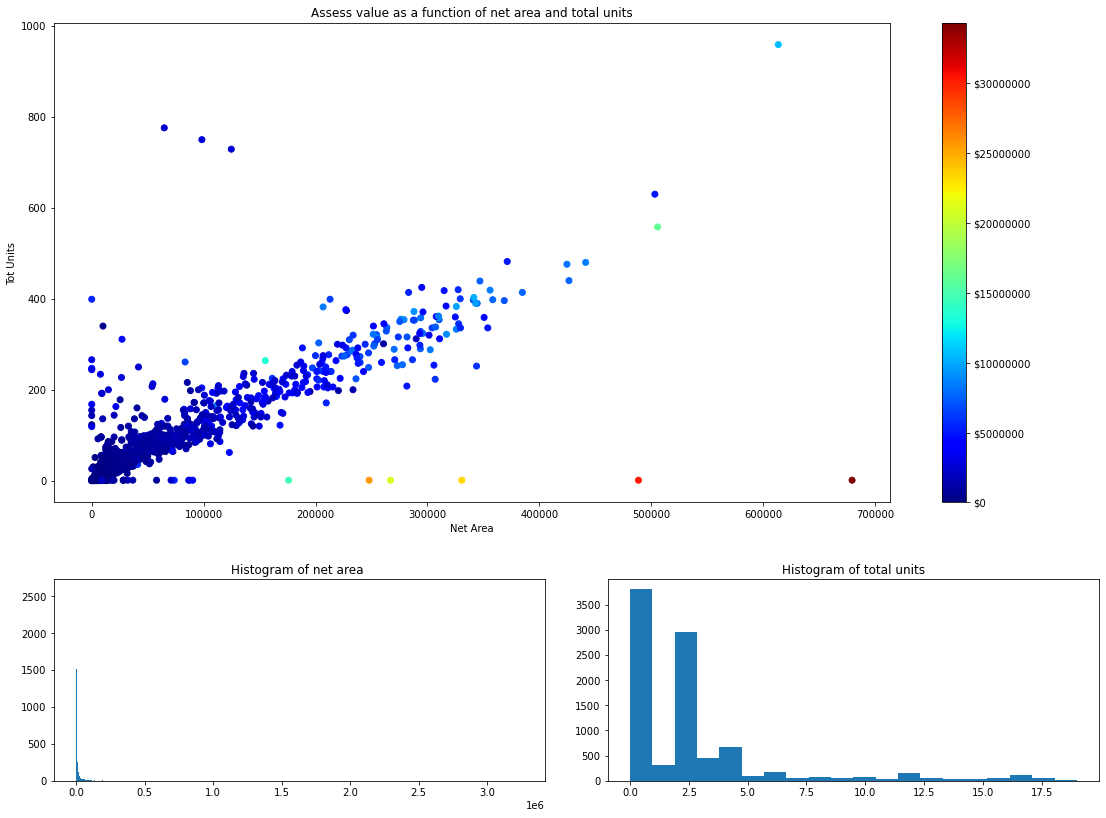

In [23]:
gs = (3,2)

#Create a new figure
fig = plt.figure(figsize=(16, 12))

#The top figure will be larger than the bottom two
ax1 = plt.subplot2grid(gs, (0, 0), colspan=2, rowspan=2)
ax1.set_title('Assess value as a function of net area and total units')
ax1.set_xlabel('Net Area')
ax1.set_ylabel('Tot Units')

#Let's create the scatter plot
sct = ax1.scatter(x= p_df.NET_AREA,y = p_df.TOT_UNITS  ,c = p_df.ASSESS_VALUE, cmap=plt.cm.jet)
plt.colorbar(sct, ax=ax1, format='$%d')


#Creating the plot on the bottom left
ax2 = plt.subplot2grid(gs, (2, 0))
ax2.hist(p_df.NET_AREA, bins='auto')
ax2.set_title('Histogram of net area ')


#Creating the plot on the bottom right
ax3 = plt.subplot2grid(gs, (2, 1))
ax3.hist(p_df.TOT_UNITS[p_df.TOT_UNITS < 20], bins =20)
ax3.set_title('Histogram of total units')

fig.tight_layout(pad=3.0)

#Why did we define gs to be (3,2) ? Don't we have only two rows ?....

List of plots

- https://matplotlib.org/api/axes_api.html?highlight=axes%20class#plotting

# imshow - https://matplotlib.org/3.5.0/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py

Plot an image

Load file and look at the array

Note the dtype there - float32. Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0. As a side note, the only datatype that Pillow can work with is uint8. Matplotlib plotting can handle float32 and uint8, but image reading/writing for any format other than PNG is limited to uint8 data. Why 8 bits? Most displays can only render 8 bits per channel worth of color gradation. Why can they only render 8 bits/channel? Because that's about all the human eye can see. More here (from a photography standpoint): Luminous Landscape bit depth tutorial.

Each inner list represents a pixel. Here, with an RGB image, there are 3 values. Since it's a black and white image, R, G, and B are all similar. An RGBA (where A is alpha, or transparency), has 4 values per inner list, and a simple luminance image just has one value (and is thus only a 2-D array, not a 3-D array). For RGB and RGBA images, Matplotlib supports float32 and uint8 data types. For grayscale, Matplotlib supports only float32. If your array data does not meet one of these descriptions, you need to rescale it.

In [24]:
import matplotlib.image as mpimg

img = mpimg.imread('stinkbug.png')
print(img)
print(img.shape)

[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.4509804 ]]

 [[0.44313726 0.44313726 0.44313726]
  [0.44313726 0.44313726 0.44313726]


So, you have your data in a numpy array (either by importing it, or by generating it). Let's render it. In Matplotlib, this is performed using the imshow() function. Here we'll grab the plot object. This object gives you an easy way to manipulate the plot from the prompt.

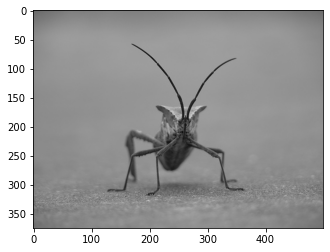

In [25]:
imgplot = plt.imshow(img)

You can also plot any numpy array

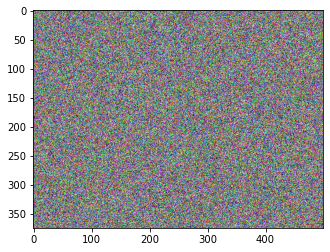

In [26]:
x = np.random.rand(562500).reshape(375, 500, 3)  # random numbers in same shape array as stinkbug
imgplot = plt.imshow(x)

Pseudocolor can be a useful tool for enhancing contrast and visualizing your data more easily. This is especially useful when making presentations of your data using projectors - their contrast is typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity images. We currently have an RGB image. Since R, G, and B are all similar (see for yourself above or in your data), we can just pick one channel of our data:

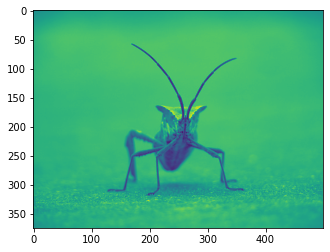

In [27]:
lum_img = img[:, :, 0]

# This is array slicing.  You can read more in the `Numpy tutorial
# <https://numpy.org/doc/stable/user/quickstart.html>`_.

plt.imshow(lum_img)

lum_img = img[:, :, 0]

# This is array slicing.  You can read more in the `Numpy tutorial
# <https://numpy.org/doc/stable/user/quickstart.html>`_.

plt.imshow(lum_img)

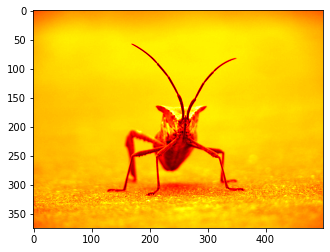

In [28]:
plt.imshow(lum_img, cmap="hot")

Note that you can also change colormaps on existing plot objects using the set_cmap() method:

It's helpful to have an idea of what value a color represents. We can do that by adding a color bar to your figure:

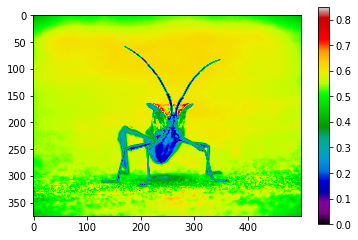

In [29]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')
plt.colorbar()

Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don't vary much, or don't matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the hist() function.

(array([2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 7.000e+00, 9.000e+00, 7.000e+00, 2.000e+00,
        7.000e+00, 1.000e+01, 1.100e+01, 1.500e+01, 1.400e+01, 2.700e+01,
        2.100e+01, 2.400e+01, 1.400e+01, 3.100e+01, 2.900e+01, 2.800e+01,
        2.400e+01, 2.400e+01, 4.000e+01, 2.600e+01, 5.200e+01, 3.900e+01,
        5.700e+01, 4.600e+01, 8.400e+01, 7.600e+01, 8.900e+01, 8.000e+01,
        1.060e+02, 1.130e+02, 1.120e+02, 9.000e+01, 1.160e+02, 1.090e+02,
        1.270e+02, 1.350e+02, 9.800e+01, 1.310e+02, 1.230e+02, 1.110e+02,
        1.230e+02, 1.160e+02, 1.010e+02, 1.170e+02, 1.000e+02, 1.010e+02,
        9.000e+01, 1.060e+02, 1.260e+02, 1.040e+02, 1.070e+02, 1.110e+02,
        1.380e+02, 1.000e+02, 1.340e+02, 1.210e+02, 1.400e+02, 1.320e+02,
        1.390e+02, 1.160e+02, 1.330e+02, 1.180e+02, 1.080e+02, 1.170e+02,
        1.280e+02, 1.200e+02, 1.210e+02, 1.100e+02, 1.160e+02, 1.180e+02,
        9.700e+01, 9.700e+01, 1.140e+0

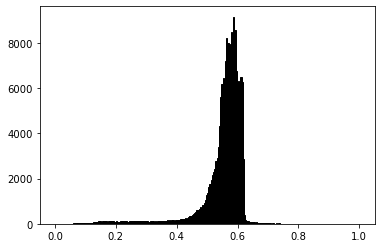

In [30]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')  # fc=facecolor and ec=edgecolor

Most often, the "interesting" part of the image is around the peak, and you can get extra contrast by clipping the regions above and/or below the peak. In our histogram, it looks like there's not much useful information in the high end (not many white things in the image). Let's adjust the upper limit, so that we effectively "zoom in on" part of the histogram. We do this by passing the clim argument to imshow. You could also do this by calling the set_clim() method of the image plot object, but make sure that you do so in the same cell as your plot command when working with the Jupyter Notebook - it will not change plots from earlier cells.

You can specify the clim in the call to plot.

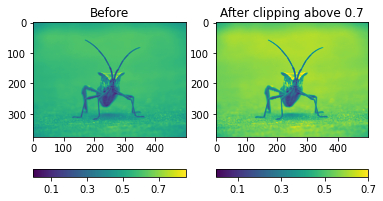

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
ax.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After clipping above 0.7')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

# Heatmap example

In [32]:
samples = 1024
x = np.random.randn(samples)
y = np.random.randn(samples)

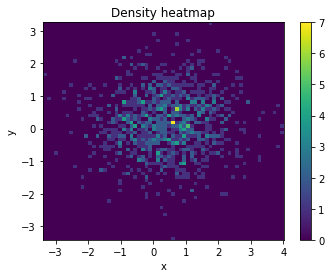

In [33]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(64,64))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
 
plt.title('Density heatmap')
plt.ylabel('y')
plt.xlabel('x')

plt.imshow(heatmap, extent=extent)
plt.colorbar()


# Plotting correlation 

Helpful Article [here](https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22)

In [34]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None)

df.columns = ['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]

In [35]:
df.head(10)

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [36]:
# Let's check data types
df.dtypes

Sex         object
Length     float64
Diam       float64
Height     float64
Whole      float64
Shucked    float64
Viscera    float64
Shell      float64
Rings        int64
dtype: object

C:\Users\donda\AppData\Local\Temp/ipykernel_2512/343016812.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=10)
C:\Users\donda\AppData\Local\Temp/ipykernel_2512/343016812.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=10)


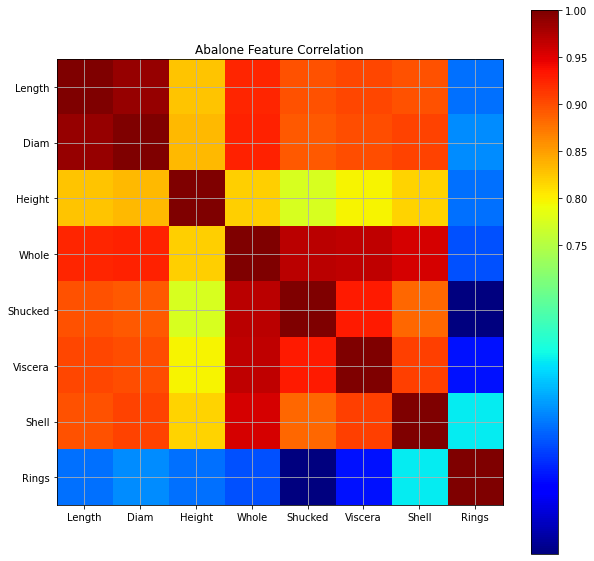

In [37]:
#Create a new image
f, ax1 = plt.subplots(figsize=(10, 10))

#Create the correlation plot
cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=plt.cm.jet)
ax1.grid(True)

#Figure information
plt.title('Abalone Feature Correlation')
labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
ax1.set_xticklabels(labels,fontsize=10)
ax1.set_yticklabels(labels,fontsize=10)


#Let's specify where to place ticks on the color bar to make it easier to read
f.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])

# seaborn
Seaborn is a Python data visualization library based on matplotlib.

In [38]:
#!pip install --upgrade seaborn

# statistical relationships

In [39]:
import seaborn as sns
sns.__version__

'0.11.2'

In [40]:
sns.set(style="darkgrid")


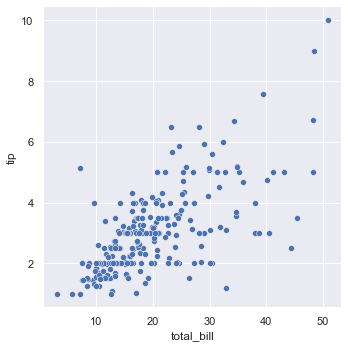

In [41]:
# scatter
tips = sns.load_dataset("tips")
tips.head()

# Let's create a relational plot between tips and total_bill
sns.relplot(x="total_bill", y="tip", data=tips);

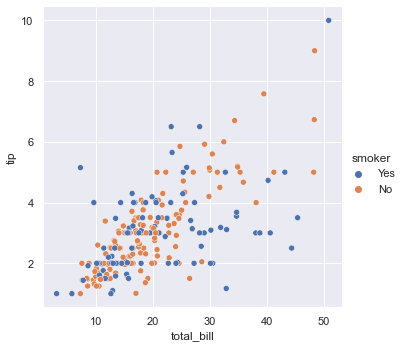

In [42]:
# 3 variable using hue. 
# We plot the same data as above but we will color each data point differently using the 
# categorical variable smoker
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

# Now we're getting somewhere....

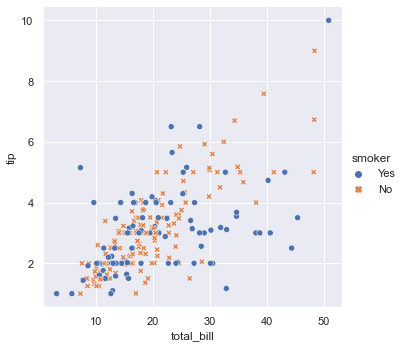

In [43]:
# 3 variables, let's differentiate the data even further with different markers
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

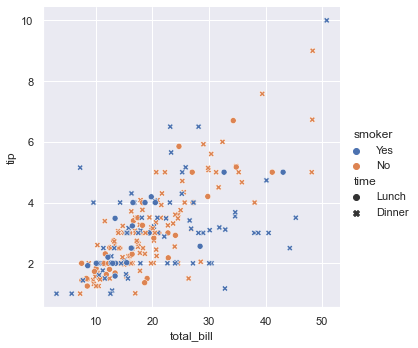

In [44]:
# 4
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

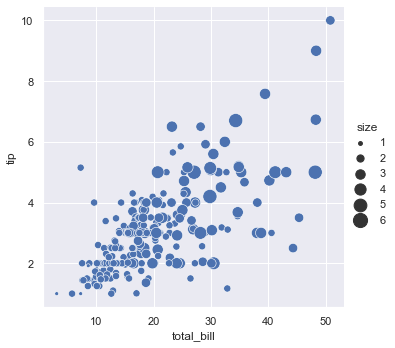

In [45]:
# controlling size
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

In [46]:
# multiple measurements
fmri = sns.load_dataset("fmri")
fmri.sample(10)

,subject,timepoint,event,region,signal
694,s2,15,cue,frontal,0.024734
876,s7,13,cue,parietal,-0.014084
547,s3,5,cue,parietal,0.088904
227,s12,2,stim,parietal,0.077277
670,s5,1,cue,parietal,0.010086
30,s12,16,stim,parietal,-0.089943
597,s9,6,cue,frontal,0.026864
1035,s4,13,cue,frontal,-0.021514
688,s8,15,cue,frontal,0.025383
201,s7,2,stim,parietal,-0.034874


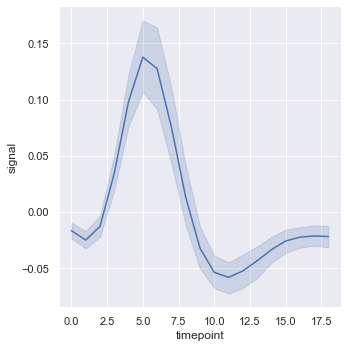

In [47]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

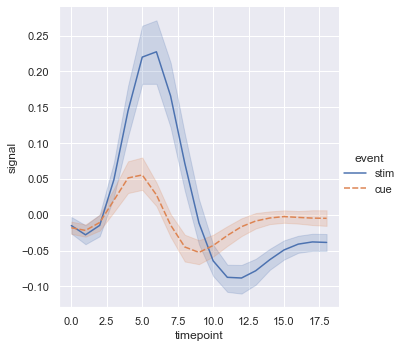

In [48]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

# Date

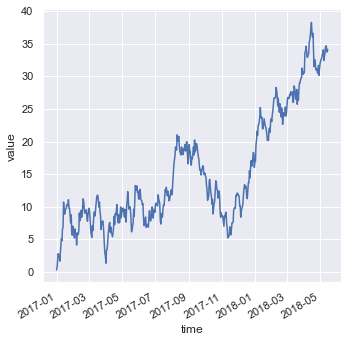

In [49]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))

g = sns.relplot(x="time", y="value", kind="line", data=df)

g.fig.autofmt_xdate()